In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))

import warnings
warnings.filterwarnings('ignore')

<Figure size 1400x800 with 0 Axes>

In [2]:
social = pd.read_csv("Social_Network_Ads.csv") 
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
social.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
social.shape

(400, 5)

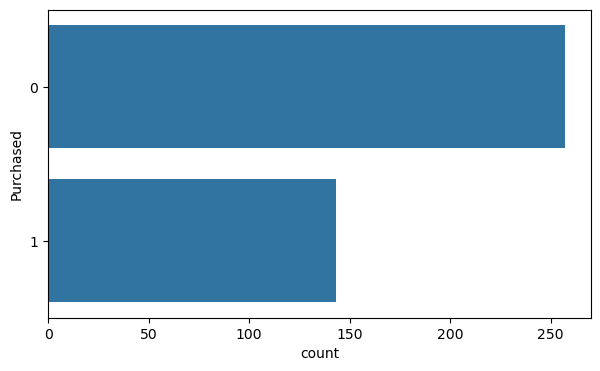

In [5]:
plt.figure(figsize=(7,4))
sns.countplot(y='Purchased', data=social)
plt.show()

In [6]:
# Method - 1
not_purchased = social.groupby('Purchased')['Purchased'].count()[0]
purchased = social.groupby('Purchased')['Purchased'].count()[1]

# Method - 2
pur = dict(social.Purchased.value_counts())
pur

print(f"\033[1m {not_purchased}\033[0m people \033[1mDid NOT Purchased\033[0m and \033[1m{purchased}\033[0m people \033[1mPurchased\033[0m.")

 257 people Did NOT Purchased and 143 people Purchased.


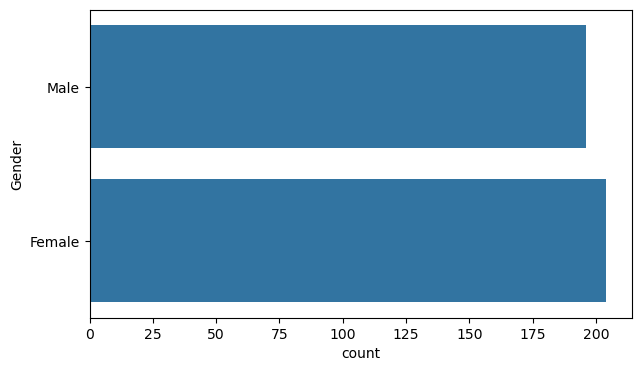

In [7]:
plt.figure(figsize=(7,4))
sns.countplot(y='Gender', data=social)
plt.show()

In [8]:
gen = dict(social.Gender.value_counts())
gen

{'Female': 204, 'Male': 196}

In [9]:
age_ = dict(social.Age.value_counts())

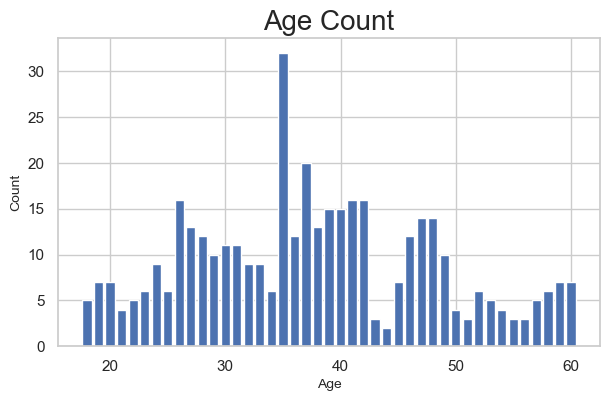

In [10]:
plt.figure(figsize=(7,4))
sns.set_theme(style="whitegrid")
plt.bar(age_.keys(),age_.values())
plt.title('Age Count', size=20)
plt.xlabel('Age',size=10)
plt.ylabel('Count',size=10)
plt.show()

In [11]:
pur_age = dict(social.groupby(['Purchased','Age'])['Purchased'].count()[1])

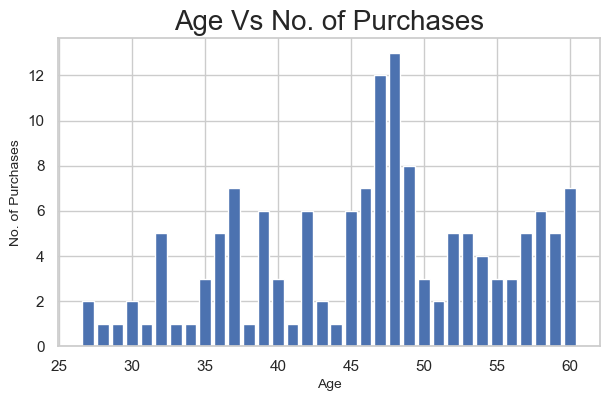

In [12]:
plt.figure(figsize=(7,4))
sns.set_theme(style="whitegrid")
plt.bar(pur_age.keys(),pur_age.values())
plt.title('Age Vs No. of Purchases', size=20)
plt.xlabel('Age',size=10)
plt.ylabel('No. of Purchases',size=10)
plt.show()

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

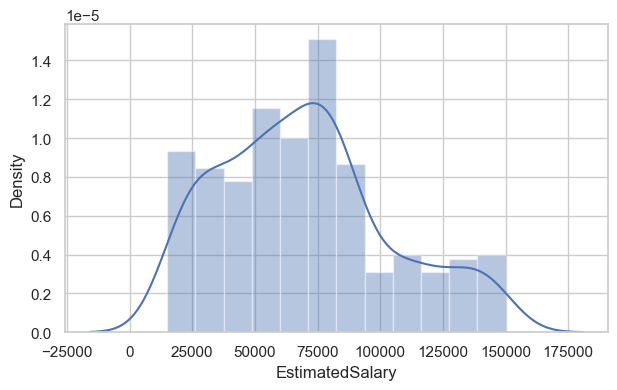

In [13]:
plt.figure(figsize=(7,4)) 
sns.distplot(social["EstimatedSalary"])

<Axes: xlabel='Age', ylabel='Density'>

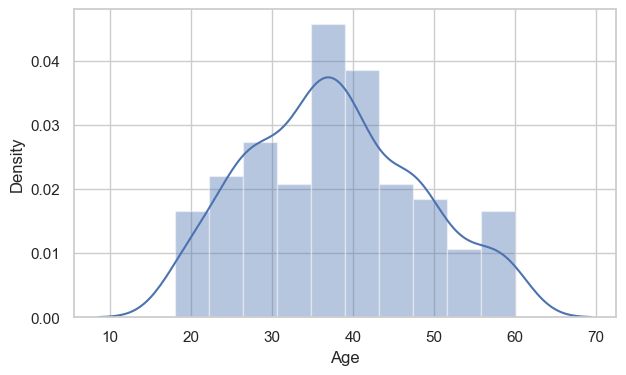

In [14]:
plt.figure(figsize=(7,4)) 
sns.distplot(social["Age"])

In [15]:
social.drop(['User ID','Gender'], axis=1, inplace=True)
social.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [16]:
x = social.iloc[:,:-1].values
y = social.iloc[:,-1].values

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0 )

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [25]:
classifier = KNeighborsClassifier(n_neighbors = 5) # n_neighbors >= 5 remain same
classifier.fit(x_train, y_train) 

y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.93

In [26]:
confusion_matrix = confusion_matrix(y_test, y_pred)

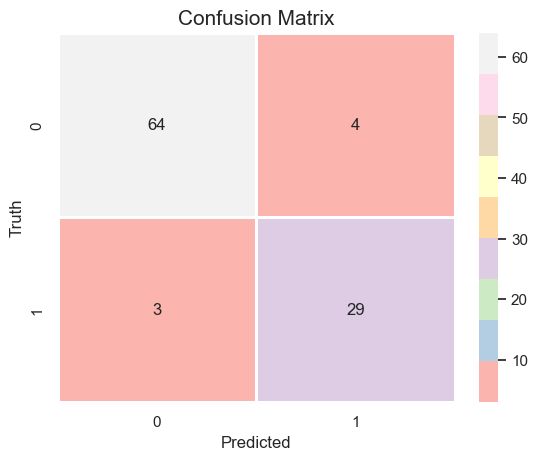

In [22]:

sns.heatmap(confusion_matrix,annot=True,cmap='Pastel1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

